Enter the number of Nodes: 5
Enter value of each node in space separated order like : 1 3 43 2 1
1 2 4 65 7
Enter the number of constraints:  4
Format of constraints: V1<V2 V2<V3 V3>V1
Enter constraints in above format: V1<V2 V2<V3 V3>V1 V5<V2
All possible edge connections ----------------
[[0, 1], [1, 2], [2, 0], [4, 1]]
----------------------------------------------
Constraint Results---------
[True, True, True, False]
---------------------------
Connect edges only between the following:------
[0, 1]
[1, 2]
[2, 0]
Final Adjacency matrix------------
[0, 1, 1, 0, 0]
[1, 0, 1, 0, 0]
[1, 1, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
----------------------------------


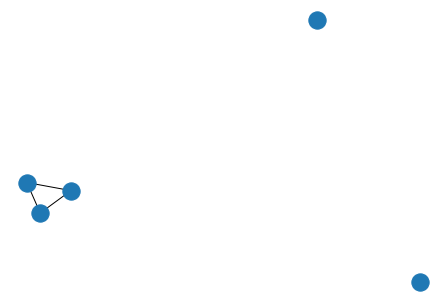

In [1]:
#Imports
import numpy as np
import networkx as nx
#Inputs
n=int(input("Enter the number of Nodes: "))
print("Enter value of each node in space separated order like : 1 3 43 2 1")
n_vals = list(map(int, input().split()))

nc=int(input("Enter the number of constraints:  "))
print("Format of constraints: V1<V2 V2<V3 V3>V1")
const=input("Enter constraints in above format: ")
#Initialize matrix with all zeroes
adjmatrix=[]

for i in range(n):
    aditer=[]
    for j in range(n):
        aditer.append(0)
    adjmatrix.append(aditer)


#print(adjmatrix)

#extract list of variables in each constraint respectively

conlist=const.split()
#print(conlist)
var_relations=[]
for i in conlist:
    var_iter=[]
    for j in range(len(i)):
        if(i[j]=="V"):
            var_iter.append(int(i[j+1])-1)
    var_relations.append(var_iter)
print('All possible edge connections ----------------')
print(var_relations)
print('----------------------------------------------')


#convert the constraint to usable form
for i in range(1,n+1):
    var="V"+str(i)
    const= const.replace(var,str(n_vals[i-1]))
#print(const)
const_list=const.split()
#print(const_list)

const_bools=[]
for i in const_list:
    #print(i)
    const_bools.append(eval(i))
print('Constraint Results---------')
print(const_bools)
print('---------------------------')


#Alter the matrix
print('Connect edges only between the following:------')
for i in range(len(var_relations)):
    if(const_bools[i]):
        print(var_relations[i])
        a=var_relations[i][0]
        b=var_relations[i][1]
        adjmatrix[a][b]=1
        adjmatrix[b][a]=1

#display matrix
print("Final Adjacency matrix------------")
for i in adjmatrix:
    print(i)
print('----------------------------------')

b= np.matrix(adjmatrix)
k=nx.from_numpy_matrix(b)
nx.draw(k)